In [25]:
#for tau mode

import numpy as np
from sympy import Symbol, integrate, sqrt, cos, exp
import matplotlib.pyplot as plt

# Constants
#w = 1.59
G_F = 1.1663787*10**(-5)
V_cb = 40.9*10**(-3)
tau_b_0 = 1.519*10**(-12)

# Masses in GeV/c^2
#m_D = 1.86486
#m_D_star= 2.01027
#m_B = 5.27955
m_Bc = 6.2749   #mass of m_Bc meson
m_jpsi = 3.0969  #mass of J/psi
m_b = 4.18
m_c = 1.275
m_tau = 1.77686
#m_e = 0.000511
#m_uon = 0.1057

#q_2 = 5
#r = m_D_star/m_B  #r=r_D_star



# Spacing and defining range
q_2 = np.linspace(m_tau**2, (m_Bc - m_jpsi)**2, 10000)



def D_gamma(q_2):

  lamda_jpsi = ((m_Bc-m_jpsi)**2 -q_2)*((m_Bc+m_jpsi)**2-q_2)

  #form_factor
  V_C_0 = 0.42
  A_C_0_0 = 0.52
  A_C_1_0 = 0.46
  A_C_2_0 = 0.64

  #wilson coefficenits
  C_V_1 = 0
  C_V_2 = 0
  C_S_2 = 0
  C_S_1 = 0
  C_T = 0



  V_C = V_C_0*np.exp(0.065*q_2 + 0.0015*q_2**2)
  A_C_0 = A_C_0_0*np.exp(0.047*q_2 + 0.0017*q_2**2)
  A_C_1 = A_C_1_0*np.exp(0.038*q_2 + 0.0015*q_2**2)
  A_C_2 = A_C_2_0*np.exp(0.064*q_2 + 0.0041*q_2**2)

  #tensor form_factor
  T_C_1 = ((m_b + m_c)/(m_Bc + m_jpsi))*V_C
  T_C_2 = ((m_b - m_c)/(m_Bc - m_jpsi))*A_C_1
  T_C_3 = -((m_b-m_c)/q_2)*((m_Bc*(A_C_1 - A_C_2)) + m_jpsi*(A_C_2 + A_C_1 - 2*A_C_0))

  #hadronoic helicity amplitude
  H_V_plus = (m_Bc + m_jpsi)*A_C_1 - ((np.sqrt(lamda_jpsi))/(m_Bc + m_jpsi))*V_C
  H_V_minus = (m_Bc + m_jpsi)*A_C_1 + ((np.sqrt(lamda_jpsi))/(m_Bc + m_jpsi))*V_C

  H_V_0 = ((m_Bc + m_jpsi)/(2*m_jpsi*np.sqrt(q_2)))*(-(m_Bc**2 - m_jpsi**2 - q_2)*A_C_1 + (lamda_jpsi/(m_Bc + m_jpsi)**2)*A_C_2)
  H_V_t = -np.sqrt(lamda_jpsi/q_2)*A_C_0

  H_S = -(np.sqrt(lamda_jpsi)/(m_b+m_c))*A_C_0

  H_T_plus = (1/q_2)*((m_Bc**2 - m_jpsi**2)*T_C_2 + np.sqrt(lamda_jpsi)*T_C_1)
  H_T_minus = (1/q_2)*(-(m_Bc**2 - m_jpsi**2)*T_C_2 + np.sqrt(lamda_jpsi)*T_C_1)

  H_T_0 = (1/2*m_jpsi)*(-(m_Bc**2+ 3*m_jpsi**2 -q_2)*T_C_2 + (lamda_jpsi/(m_Bc**2-m_jpsi**2))*T_C_3)

  #hadronic transition

  alpha = (G_F**2*(abs(V_cb))**2)/(192*np.pi**3*m_Bc**3)*q_2*np.sqrt(lamda_jpsi)*(1-(m_tau**2/q_2))**2

  B_1 = (1+(abs(C_V_1))**2 + (abs(C_V_2))**2)*((1+(m_tau**2/(2*q_2)))*(H_V_plus**2 + H_V_minus**2 + H_V_0**2) + (3/2)*(m_tau**2/q_2)*H_V_t**2)

  B_2 = 2*((1+C_V_1)*np.conjugate(C_V_2)).real * (((1+(m_tau**2/(2*q_2))))*(H_V_0**2 + 2*H_V_plus*H_V_minus) + (3/2)*(m_tau**2/q_2)*H_V_t**2)

  B_3 = (3/2)*(abs(C_S_1-C_S_2))**2*H_S**2 + 8*(abs(C_T))**2*(1+(2*m_tau**2/q_2))*(H_T_plus**2 + H_T_minus**2 + H_T_0**2)

  B_4 = 3*((((1 + C_V_1 - C_V_2))*(np.conjugate(C_S_1)-np.conjugate(C_S_2))).real)*(m_tau/np.sqrt(q_2))*H_S*H_V_t

  B_5 = -12*(((1+C_V_1)*np.conjugate(C_T)).real)*(m_tau/q_2)*(H_T_0*H_V_0 + H_T_plus*H_V_plus - H_T_minus*H_V_minus)

  B_6 = 12*((C_V_2*np.conjugate(C_T)).real) * (m_tau/np.sqrt(q_2))*(H_T_0 *H_V_0 + H_T_plus*H_V_minus - H_T_minus*H_V_plus)

  D_gamma = alpha*(B_1 + B_2 + B_3 + B_4 + B_5 + B_6)
  return (D_gamma)
print(D_gamma(q_2))

[0.00000000e+00 1.50716860e-22 6.02548934e-22 ... 4.57404891e-17
 3.23497233e-17 0.00000000e+00]


4.331797235023042e-13


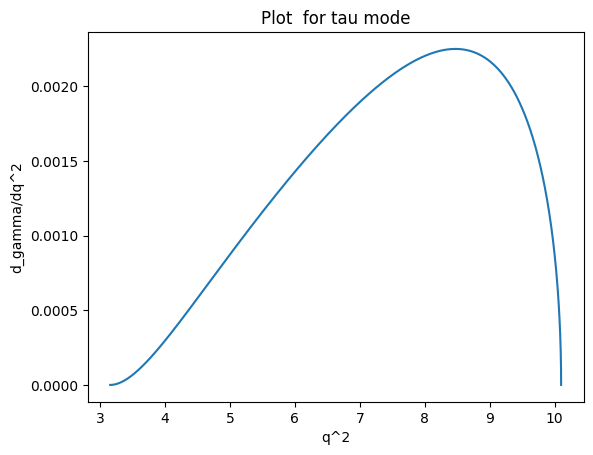

In [26]:
#plotting

tau_total = 6.58*10**(-25)/tau_b_0
print(tau_total)
# Calculate corresponding y values
#y = D_gamma(q_2)/tau_total
y= D_gamma(q_2)/tau_total
# Create the plot
plt.plot(q_2, y)
plt.xlabel('q^2')
plt.ylabel('d_gamma/dq^2')
plt.title('Plot  for tau mode')
#plt.legend()
#plt.grid(True)

# Show the plot
plt.show()

In [27]:
# Define the function D_gamma(q_2) and tau_total
def D_gamma_integrated(q_2):
    return D_gamma(q_2)

#def tau_total():
#    return 6.58*10**(-25)/tau_b_0

q_2_0 = float(m_tau**2)
q_2_n = float((m_Bc - m_jpsi)**2)
n = 999

# Simpson's rule integration
def integrated_D_gamma(x0, xn, n):
    h = (xn - x0) / n

    # Sum
#    integration = D_gamma(q_2_n) / tau_total() + D_gamma(q_2_0) / tau_total()
    integration = D_gamma(q_2_n) + D_gamma(q_2_0)
    for i in range(1, n):
        k = q_2_0 + i * h

        if i % 3 == 0:
#            integration += 2 * D_gamma(k) / tau_total()
            integration += 2 * D_gamma(k)
        else:
#            integration += 3 * D_gamma(k) / tau_total()
            integration += 3 * D_gamma(k)

    integration *= 3* h / 8

    return integration

result = integrated_D_gamma(q_2_0, q_2_n, n)
print(result)
D_B_R_taumode = result/tau_total
print(D_B_R_taumode)

4.16187784472503e-15
0.00960773927984395


In [28]:
#for muon mode

import numpy as np
from sympy import Symbol, integrate, sqrt, cos, exp
import matplotlib.pyplot as plt

# Constants
#w = 1.59
G_F = 1.1663787*10**(-5)
V_cb = 40.9*10**(-3)
tau_b_0 = 1.519*10**(-12)

# Masses in GeV/c^2
#m_D = 1.86486
#m_D_star= 2.01027
#m_B = 5.27955
m_Bc = 6.2749   #mass of m_Bc meson
m_jpsi = 3.0969  #mass of J/psi
m_b = 4.18
m_c = 1.275
#m_tau = 1.77686
#m_e = 0.000511
m_uon = 0.1057

#q_2 = 5
#r = m_D_star/m_B  #r=r_D_star



# Spacing and defining range
q_2 = np.linspace(m_uon**2, (m_Bc - m_jpsi)**2, 10000)



def D_gamma(q_2):

  lamda_jpsi = ((m_Bc-m_jpsi)**2 -q_2)*((m_Bc+m_jpsi)**2-q_2)

  #form_factor
  V_C_0 = 0.42
  A_C_0_0 = 0.52
  A_C_1_0 = 0.46
  A_C_2_0 = 0.64

  #wilson coefficenits
  C_V_1 = 0
  C_V_2 = 0
  C_S_2 = 0
  C_S_1 = 0
  C_T = 0



  V_C = V_C_0*np.exp(0.065*q_2 + 0.0015*q_2**2)
  A_C_0 = A_C_0_0*np.exp(0.047*q_2 + 0.0017*q_2**2)
  A_C_1 = A_C_1_0*np.exp(0.038*q_2 + 0.0015*q_2**2)
  A_C_2 = A_C_2_0*np.exp(0.064*q_2 + 0.0041*q_2**2)

  #tensor form_factor
  T_C_1 = ((m_b + m_c)/(m_Bc + m_jpsi))*V_C
  T_C_2 = ((m_b - m_c)/(m_Bc - m_jpsi))*A_C_1
  T_C_3 = -((m_b-m_c)/q_2)*((m_Bc*(A_C_1 - A_C_2)) + m_jpsi*(A_C_2 + A_C_1 - 2*A_C_0))

  #hadronoic helicity amplitude
  H_V_plus = (m_Bc + m_jpsi)*A_C_1 - ((np.sqrt(lamda_jpsi))/(m_Bc + m_jpsi))*V_C
  H_V_minus = (m_Bc + m_jpsi)*A_C_1 + ((np.sqrt(lamda_jpsi))/(m_Bc + m_jpsi))*V_C

  H_V_0 = ((m_Bc + m_jpsi)/(2*m_jpsi*np.sqrt(q_2)))*(-(m_Bc**2 - m_jpsi**2 - q_2)*A_C_1 + (lamda_jpsi/(m_Bc + m_jpsi)**2)*A_C_2)
  H_V_t = -np.sqrt(lamda_jpsi/q_2)*A_C_0

  H_S = -(np.sqrt(lamda_jpsi)/(m_b+m_c))*A_C_0

  H_T_plus = (1/q_2)*((m_Bc**2 - m_jpsi**2)*T_C_2 + np.sqrt(lamda_jpsi)*T_C_1)
  H_T_minus = (1/q_2)*(-(m_Bc**2 - m_jpsi**2)*T_C_2 + np.sqrt(lamda_jpsi)*T_C_1)

  H_T_0 = (1/2*m_jpsi)*(-(m_Bc**2+ 3*m_jpsi**2 -q_2)*T_C_2 + (lamda_jpsi/(m_Bc**2-m_jpsi**2))*T_C_3)

  #hadronic transition

  alpha = (G_F**2*(abs(V_cb))**2)/(192*np.pi**3*m_Bc**3)*q_2*np.sqrt(lamda_jpsi)*(1-(m_uon**2/q_2))**2

  B_1 = (1+(abs(C_V_1))**2 + (abs(C_V_2))**2)*((1+(m_uon**2/(2*q_2)))*(H_V_plus**2 + H_V_minus**2 + H_V_0**2) + (3/2)*(m_uon**2/q_2)*H_V_t**2)

  B_2 = 2*((1+C_V_1)*np.conjugate(C_V_2)).real * (((1+(m_uon**2/(2*q_2))))*(H_V_0**2 + 2*H_V_plus*H_V_minus) + (3/2)*(m_uon**2/q_2)*H_V_t**2)

  B_3 = (3/2)*(abs(C_S_1-C_S_2))**2*H_S**2 + 8*(abs(C_T))**2*(1+(2*m_uon**2/q_2))*(H_T_plus**2 + H_T_minus**2 + H_T_0**2)

  B_4 = 3*((((1 + C_V_1 - C_V_2))*(np.conjugate(C_S_1)-np.conjugate(C_S_2))).real)*(m_uon/np.sqrt(q_2))*H_S*H_V_t

  B_5 = -12*(((1+C_V_1)*np.conjugate(C_T)).real)*(m_uon/q_2)*(H_T_0*H_V_0 + H_T_plus*H_V_plus - H_T_minus*H_V_minus)

  B_6 = 12*((C_V_2*np.conjugate(C_T)).real) * (m_uon/np.sqrt(q_2))*(H_T_0 *H_V_0 + H_T_plus*H_V_minus - H_T_minus*H_V_plus)

  D_gamma = alpha*(B_1 + B_2 + B_3 + B_4 + B_5 + B_6)
  return (D_gamma)
print(D_gamma(q_2))

[0.00000000e+00 1.59776123e-17 5.13363328e-17 ... 1.00746110e-16
 7.12543175e-17 0.00000000e+00]


4.331797235023042e-13


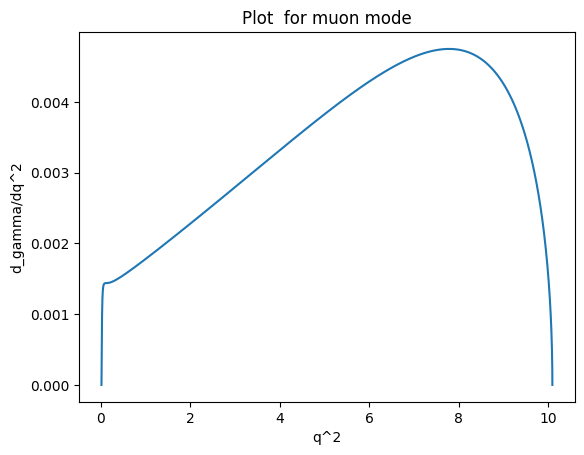

In [29]:
#plotting

tau_total = 6.58*10**(-25)/tau_b_0
print(tau_total)
# Calculate corresponding y values
#y = D_gamma(q_2)/tau_total
y= D_gamma(q_2)/tau_total
# Create the plot
plt.plot(q_2, y)
plt.xlabel('q^2')
plt.ylabel('d_gamma/dq^2')
plt.title('Plot  for muon mode')
#plt.legend()
#plt.grid(True)

# Show the plot
plt.show()

In [30]:
# Define the function D_gamma(q_2) and tau_total
def D_gamma_integrated(q_2):
    return D_gamma(q_2)

#def tau_total():
#    return 6.58*10**(-25)/tau_b_0

q_2_0 = float(m_uon**2)
q_2_n = float((m_Bc - m_jpsi)**2)
n = 999

# Simpson's rule integration
def integrated_D_gamma(x0, xn, n):
    h = (xn - x0) / n

    # Sum
#    integration = D_gamma(q_2_n) / tau_total() + D_gamma(q_2_0) / tau_total()
    integration = D_gamma(q_2_n) + D_gamma(q_2_0)
    for i in range(1, n):
        k = q_2_0 + i * h

        if i % 3 == 0:
#            integration += 2 * D_gamma(k) / tau_total()
            integration += 2 * D_gamma(k)
        else:
#            integration += 3 * D_gamma(k) / tau_total()
            integration += 3 * D_gamma(k)

    integration *= 3* h / 8

    return integration

result = integrated_D_gamma(q_2_0, q_2_n, n)
print(result)
D_B_R_muonmode = result/tau_total
print(D_B_R_muonmode)

1.4729901673737056e-14
0.03400413471490363


Branching ratio of R_j/psi

In [33]:
D_B_R_taumode = 0.00960773927984395
D_B_R_muonmode = 0.03400413471490363
R_j_psi = (D_B_R_taumode/D_B_R_muonmode)
print(R_j_psi)

0.28254620681857806
